<a href="https://colab.research.google.com/github/SiLiKhon/RICH_GAN_misc/blob/master/RICH_Data_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RICH Data Overview

## Get the data

The training sample is shared [here](https://cernbox.cern.ch/index.php/s/RkZoMRBofrhqzZm).

These are simulated detector responses for 6 particle types (below are per-file links to the same files as above):



*   electrons https://cernbox.cern.ch/index.php/s/q5ZwDYfvOXJmnBR
*   kaons https://cernbox.cern.ch/index.php/s/nfBRDGCagdgor3q
*   muons https://cernbox.cern.ch/index.php/s/jfw0Nhyw8gYNBhk
*   pions https://cernbox.cern.ch/index.php/s/dyZJGMZuVRW0Kgg
*   protons https://cernbox.cern.ch/index.php/s/SQ6G6dmLOLTvMuz
*   ghosts https://cernbox.cern.ch/index.php/s/9Ui4xKerEDdw7Fv (these are 'fake' tracks - i.e. random tracker hits that look like a track from a real particle)



In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
from itertools import combinations, product
from functools import reduce

import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

In [3]:
data_dir = Path('/_data/data_csv')

data = {}
for file in data_dir.iterdir():
    name = file.stem.split('_')[1]
    data[name]  = pd.read_csv(file.as_posix())

In [4]:
print(f'Particle types:\n{list(data.keys())}')
cols = list(data.values())[0].columns.tolist()
print(f'Features:\n{cols}')

Particle types:
['ghost', 'proton', 'electron', 'muon', 'kaon', 'pion']
Features:
['TrackPt', 'TrackP', 'NumLongTracks', 'MCParticleType', 'RichDLLbt', 'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe', 'TrackEta']


Input variables are:
*   `TrackP` – full momentum of the particle
*   `TrackPt` – length of the momentum projection to the XY plane
*   `TrackEta` – track [pseudorapidity](https://en.wikipedia.org/wiki/Pseudorapidity)
*   `NumLongTracks` – number of reconstructed tracks in current event

Please note that among P, Pt and ETA there are only **two** independant variables. 


The variables to predict are:

*   `RichDLLbt`
*   `RichDLLk`
*   `RichDLLmu`
*   `RichDLLp`
*   `RichDLLe`


There's also one additional variable:

*   `MCParticleType` – particle [PDG code](http://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf)




In [5]:
x_cols = ['TrackP', 'TrackEta', 'NumLongTracks']
y_cols = ['RichDLLbt', 'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe']

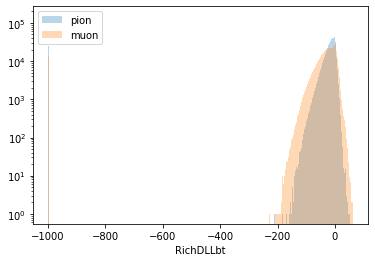

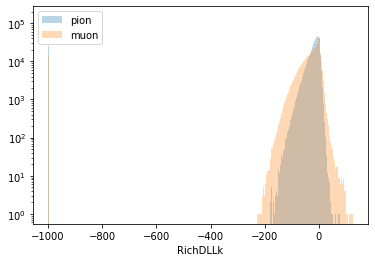

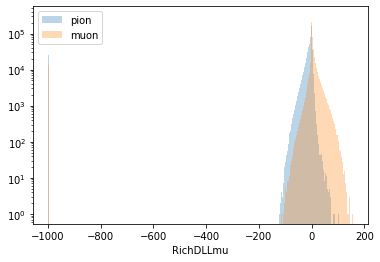

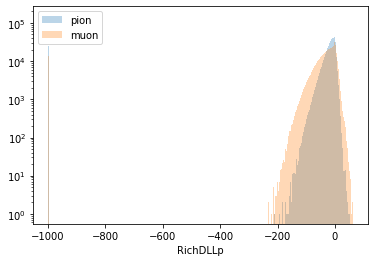

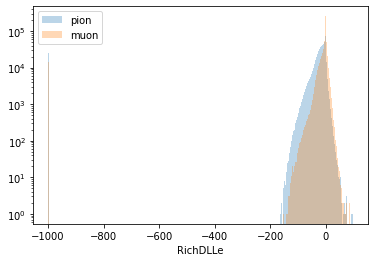

In [6]:
for col in y_cols:
    left = reduce(min,[data[p][col].min() for p in ('pion','muon')])
    right = reduce(max,[data[p][col].max() for p in ('pion','muon')])
    bins = np.linspace(
        start=left, 
        stop =right, 
        num=601
    )
    for p in ('pion','muon'):
        plt.hist(data[p][col], bins=bins, label=p,alpha=0.3)
    plt.yscale('log')
    plt.legend()
    plt.xlabel(col)
    plt.show()

One can see there's a peak of outliers at the left handside of the plot. Let's not bother about it so far.

In [7]:
def not_outliers(df,m):
    left = (df >= df.median() - df.std()*m).all(axis=1)
    right = (df <= df.median() + df.std()*m).all(axis=1)
    return left&right

In [9]:
masks = {p:not_outliers(data[p],2) for p in data}

### Feature histograms for all particle types

In [15]:
path.mkdir()

PosixPath('/_data/richgan/figs/marginal_c')

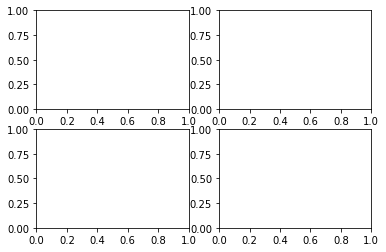

In [22]:
f, axes = plt.subplots(nrows=2, ncols=2)

In [25]:
axes[0][0]

In [29]:
data.keys()

dict_keys(['ghost', 'proton', 'electron', 'muon', 'kaon', 'pion'])

In [30]:
particles = ['proton', 'muon', 'kaon', 'pion']

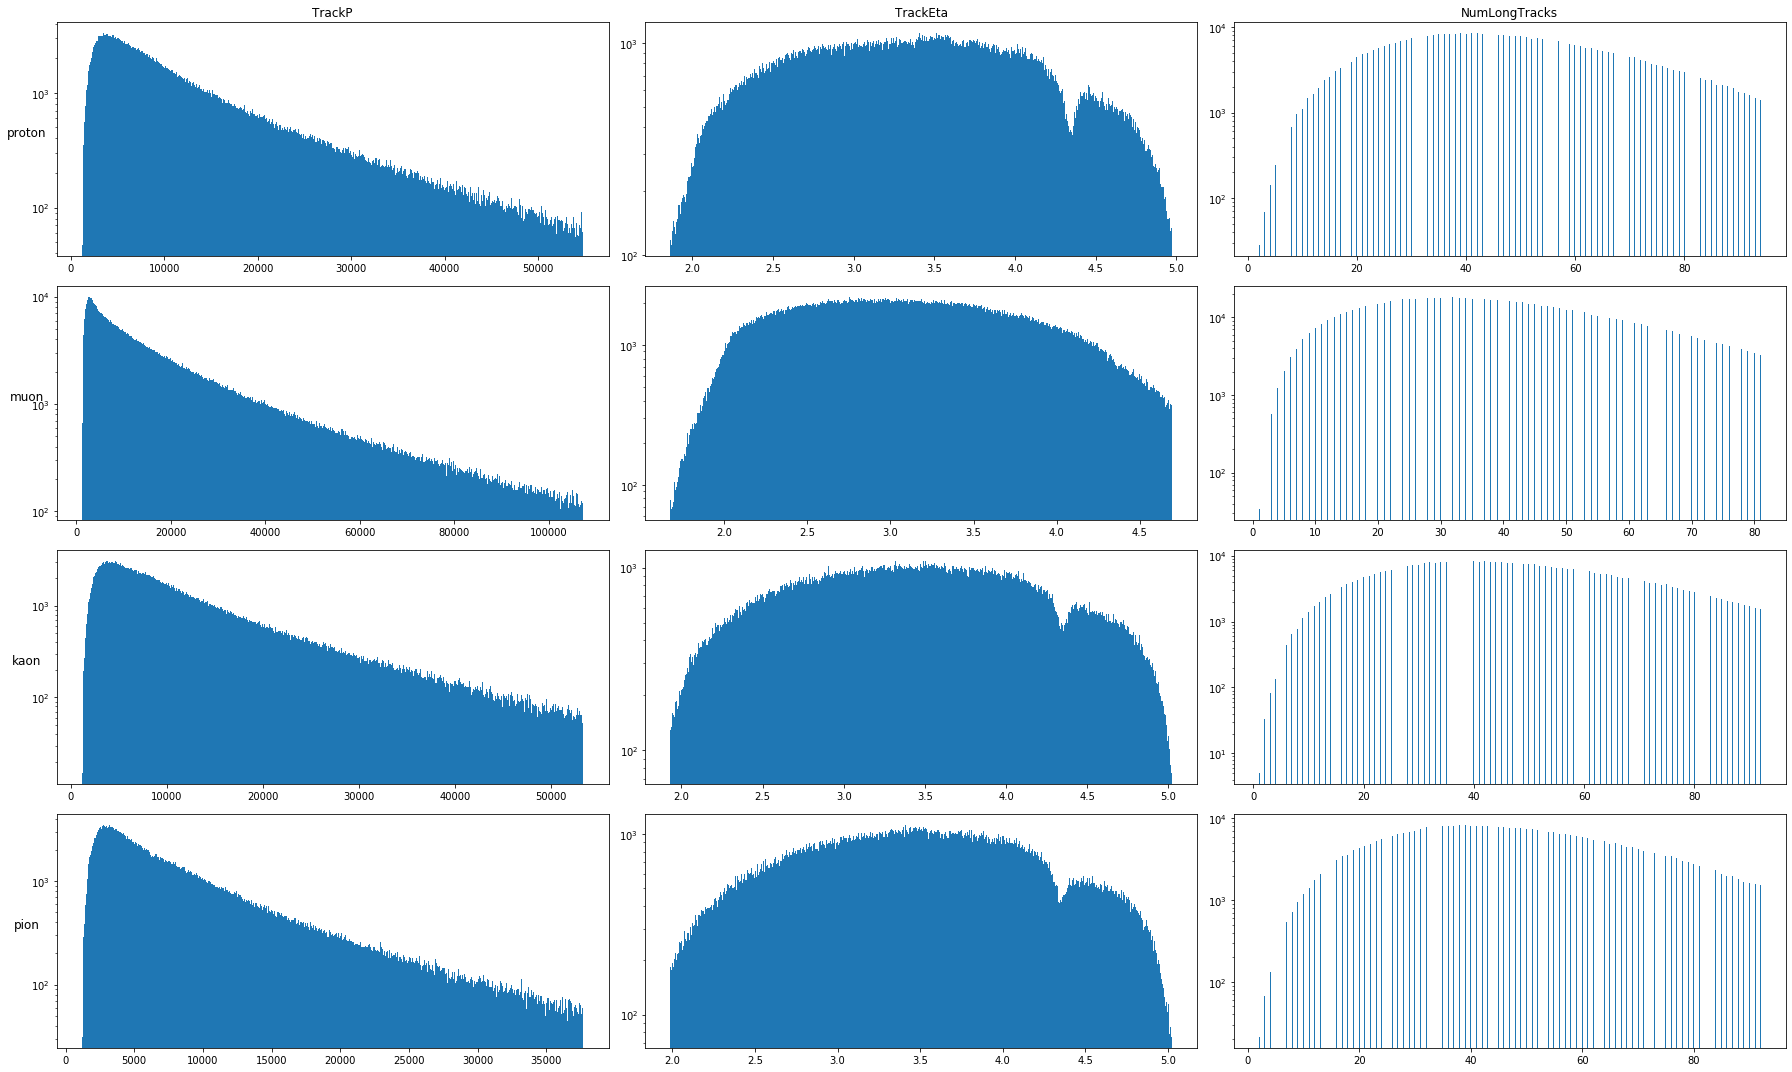

In [35]:
fig, axes = plt.subplots(nrows=len(particles), ncols=len(x_cols), figsize=(25,15))
for i, p in enumerate(particles):
    for j, col in enumerate(x_cols):
        _, _, img = axes[i][j].hist(data[p][masks[p]][col],bins=601)
        axes[i][j].set_yscale('log')

for ax, col in zip(axes[0], x_cols):
    ax.set_title(col)
for ax, row in zip(axes[:,0], particles):
    ax.set_ylabel(row,rotation=0,size='large')
fig.tight_layout()
plt.show()
fig.savefig('/_data/marginal_c.png', format='png')

### DLL histogram for all particle types

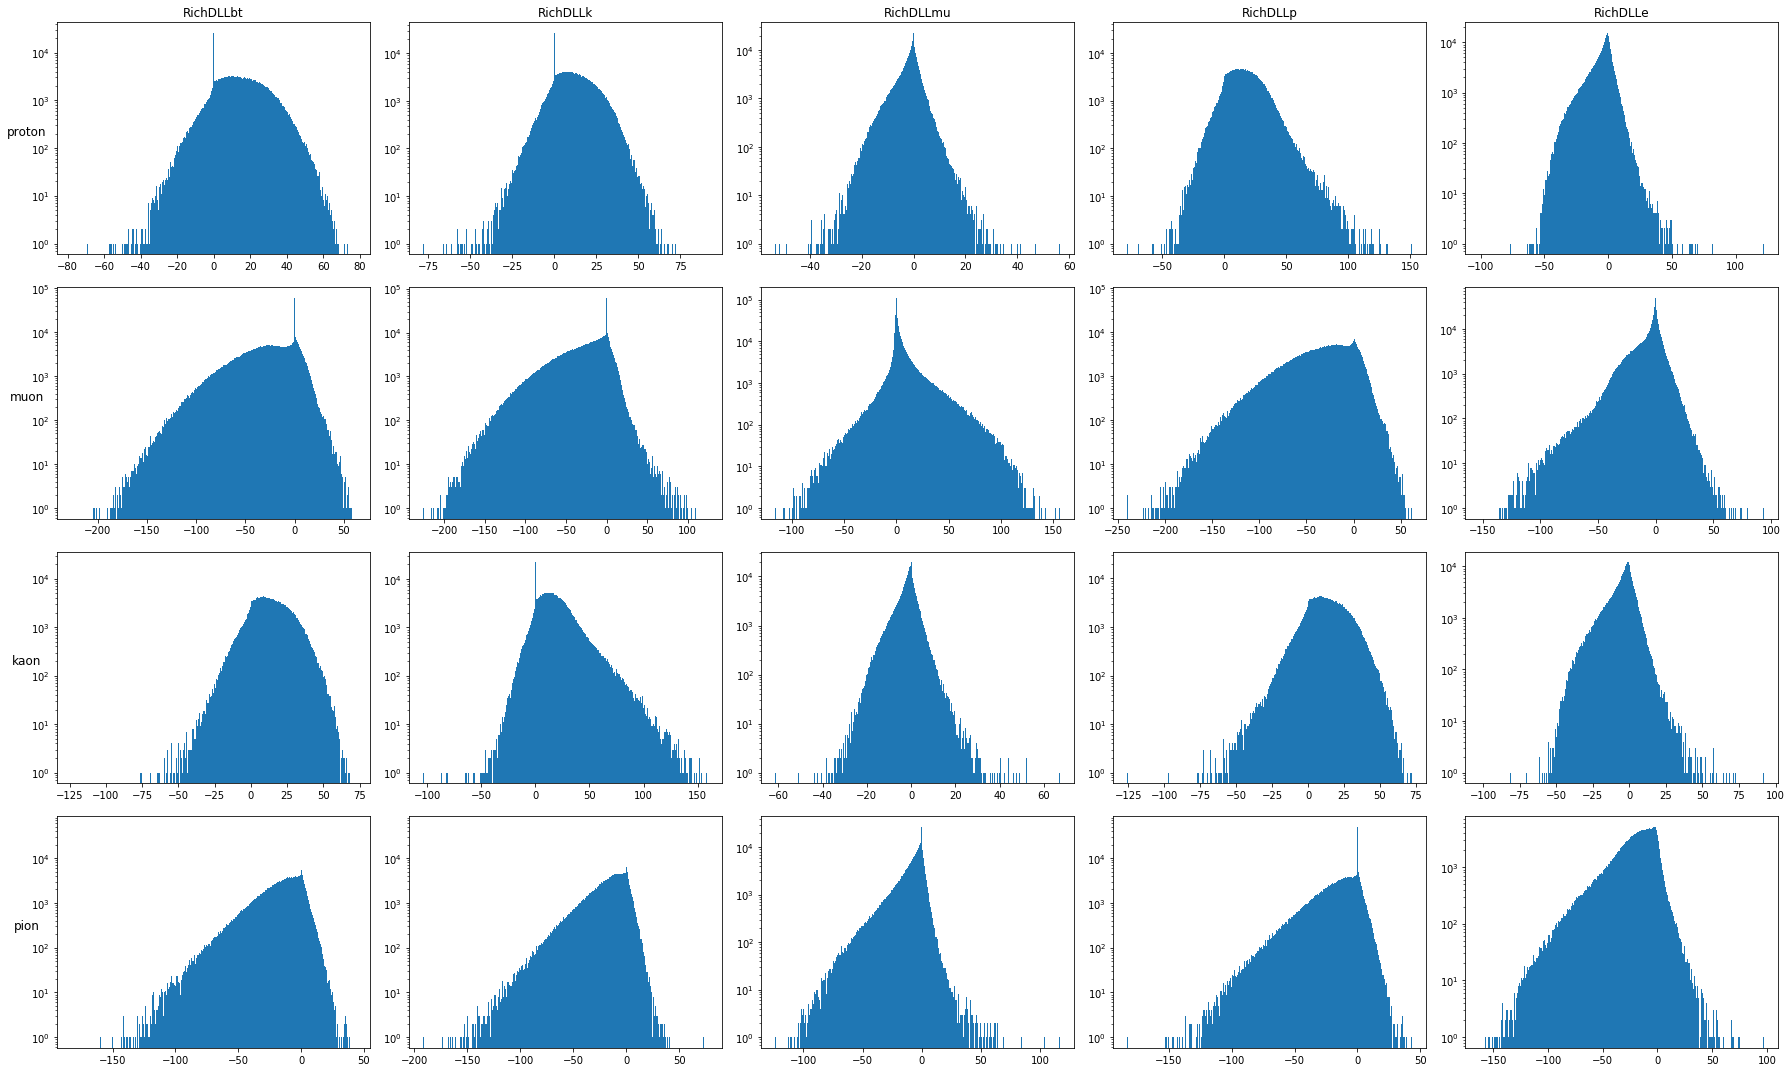

In [37]:
fig, axes = plt.subplots(nrows=len(particles), ncols=len(y_cols), figsize=(25, 15))
for i, p in enumerate(particles):
    for j, col in enumerate(y_cols):

        _, _, img = axes[i][j].hist(data[p][masks[p]][col],bins=601)
        axes[i][j].set_yscale('log')
for ax, col in zip(axes[0], y_cols):
    ax.set_title(col)
for ax, row in zip(axes[:,0], particles):
    ax.set_ylabel(row,rotation=0, size='large')
fig.tight_layout()
fig.savefig('/_data/marginal_x.png', format='png')


In [39]:
data['kaon']

,TrackPt,TrackP,NumLongTracks,MCParticleType,RichDLLbt,RichDLLk,RichDLLmu,RichDLLp,RichDLLe,TrackEta
0,733.720825,7811.620117,40.0,321,5.395000,5.395000,-2.7621,5.395000,-6.4719,3.056173
1,766.389587,13805.900391,29.0,321,32.001301,48.601002,-4.4894,32.001301,-11.0133,3.583537
2,454.289093,4635.049805,32.0,321,17.493500,17.493500,-12.2938,17.493500,-7.7980,3.013405
3,1054.564331,4333.899902,26.0,321,19.676600,19.676600,-7.5441,19.676600,-11.6452,2.091345
4,1975.175537,24745.910156,57.0,-321,20.518400,52.582600,0.0612,10.397500,0.0172,3.219554
...,...,...,...,...,...,...,...,...,...,...
999988,876.849548,16737.480469,56.0,321,17.089800,20.539700,-1.0322,17.089800,-5.0528,3.641531
999989,835.390259,23517.230469,21.0,-321,25.486799,84.118401,-1.1267,9.697500,0.0724,4.030421
999990,998.466431,4306.109863,17.0,321,33.069599,33.069599,-6.5296,33.069599,-10.5978,2.140996
999991,191.116104,9211.209961,24.0,321,5.389700,5.389700,-1.9784,5.389700,-1.8792,4.568335


In [51]:
def plot_hist2d(data, x_cols, y_cols, bins_x, bins_y):
    fig, axes = plt.subplots(
        nrows=len(y_cols),
        ncols=len(x_cols),
        figsize=(15,25)
    )
    for i, col1 in enumerate(y_cols):
        for j, col2 in enumerate(x_cols):
             _, _, _, img = axes[i][j].hist2d(
                x=data[col1],
                y=data[col2],
                bins=(bins_x, bins_y),
                cmap='inferno',
                norm=colors.LogNorm()
            )
    for ax, col in zip(axes[0], x_cols):
        ax.set_title(col)
    for ax, row in zip(axes[:,0], y_cols):
        ax.set_ylabel(row,rotation=0, size='large')
    fig.tight_layout()
    return fig

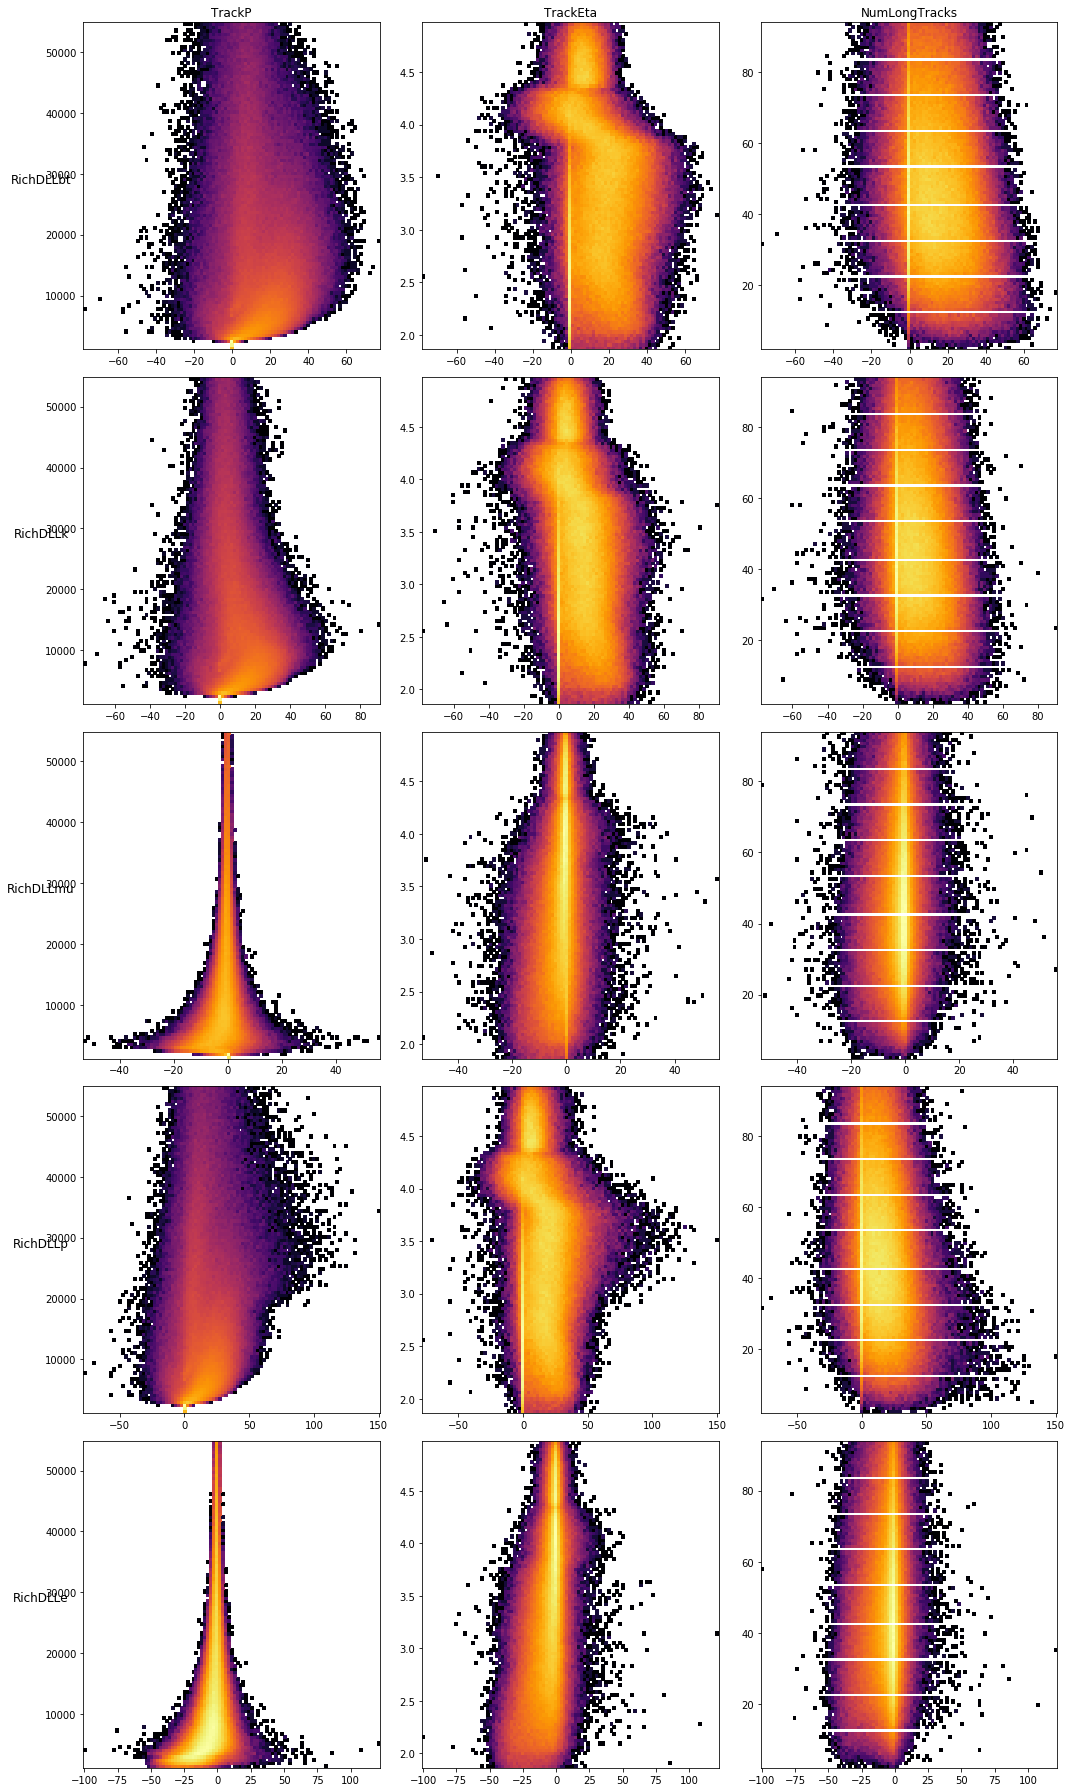

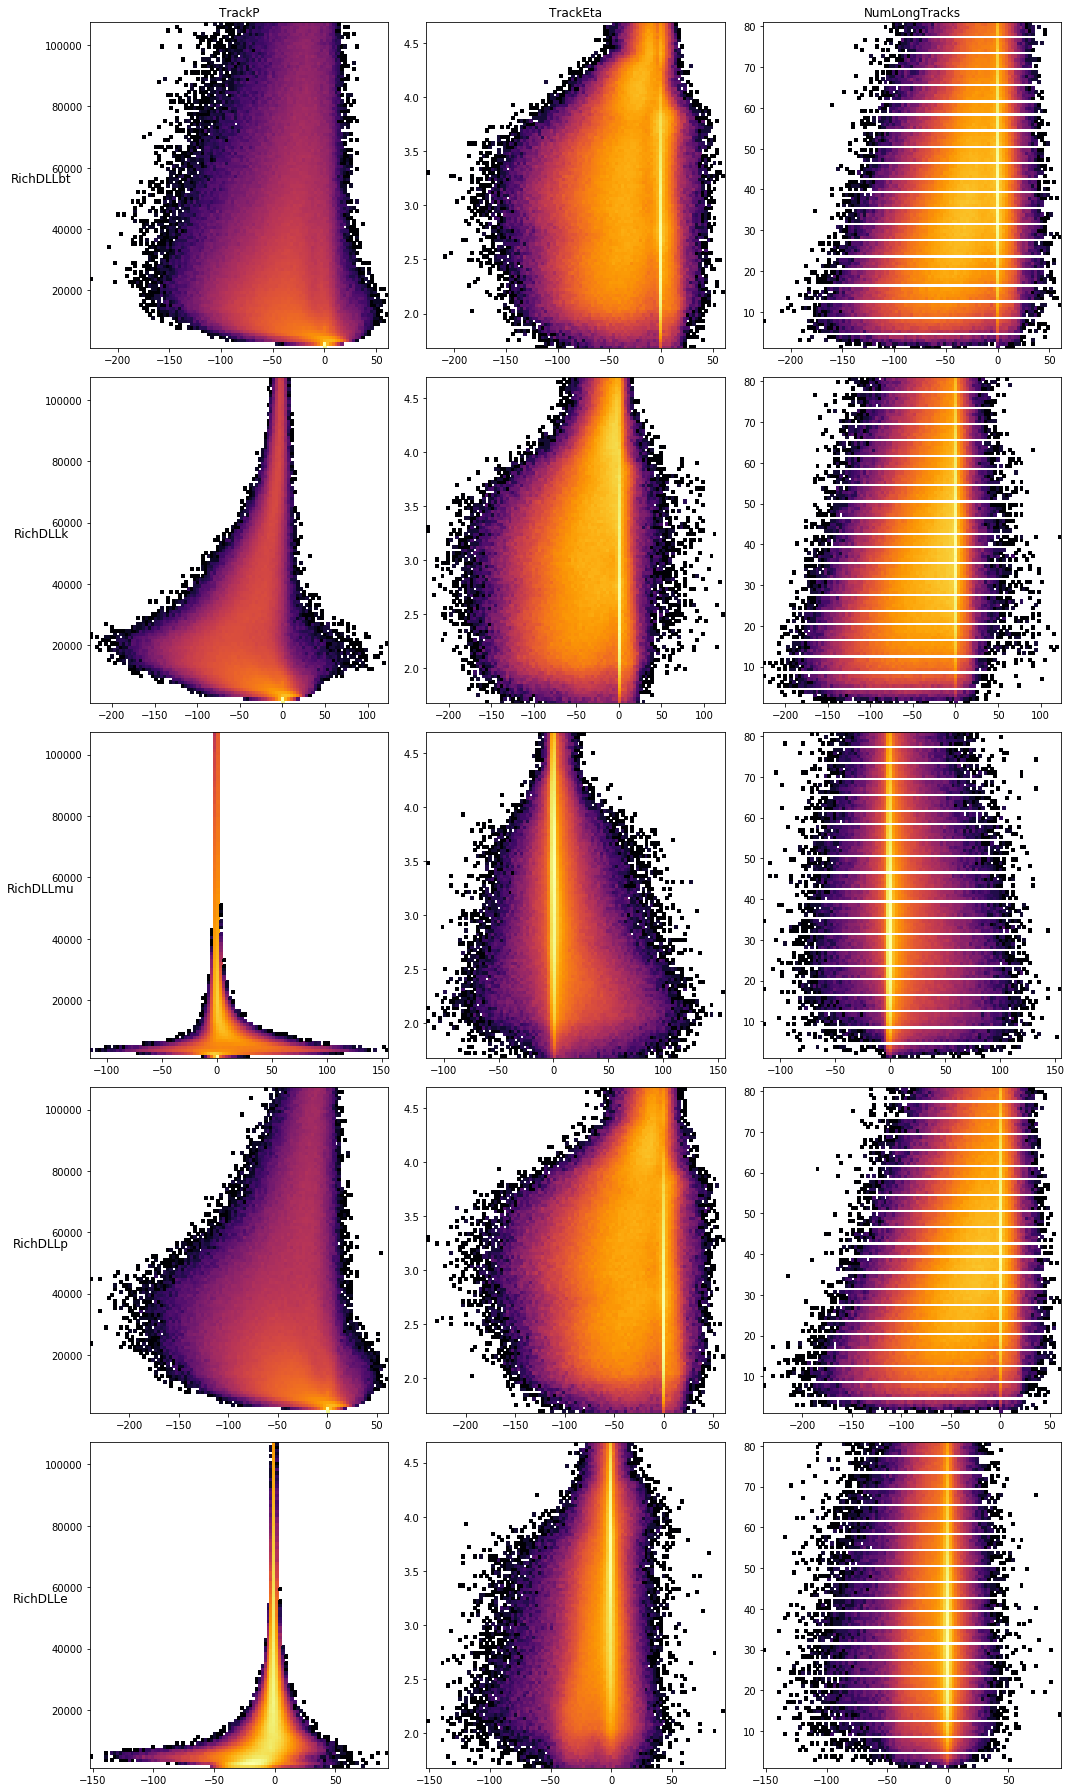

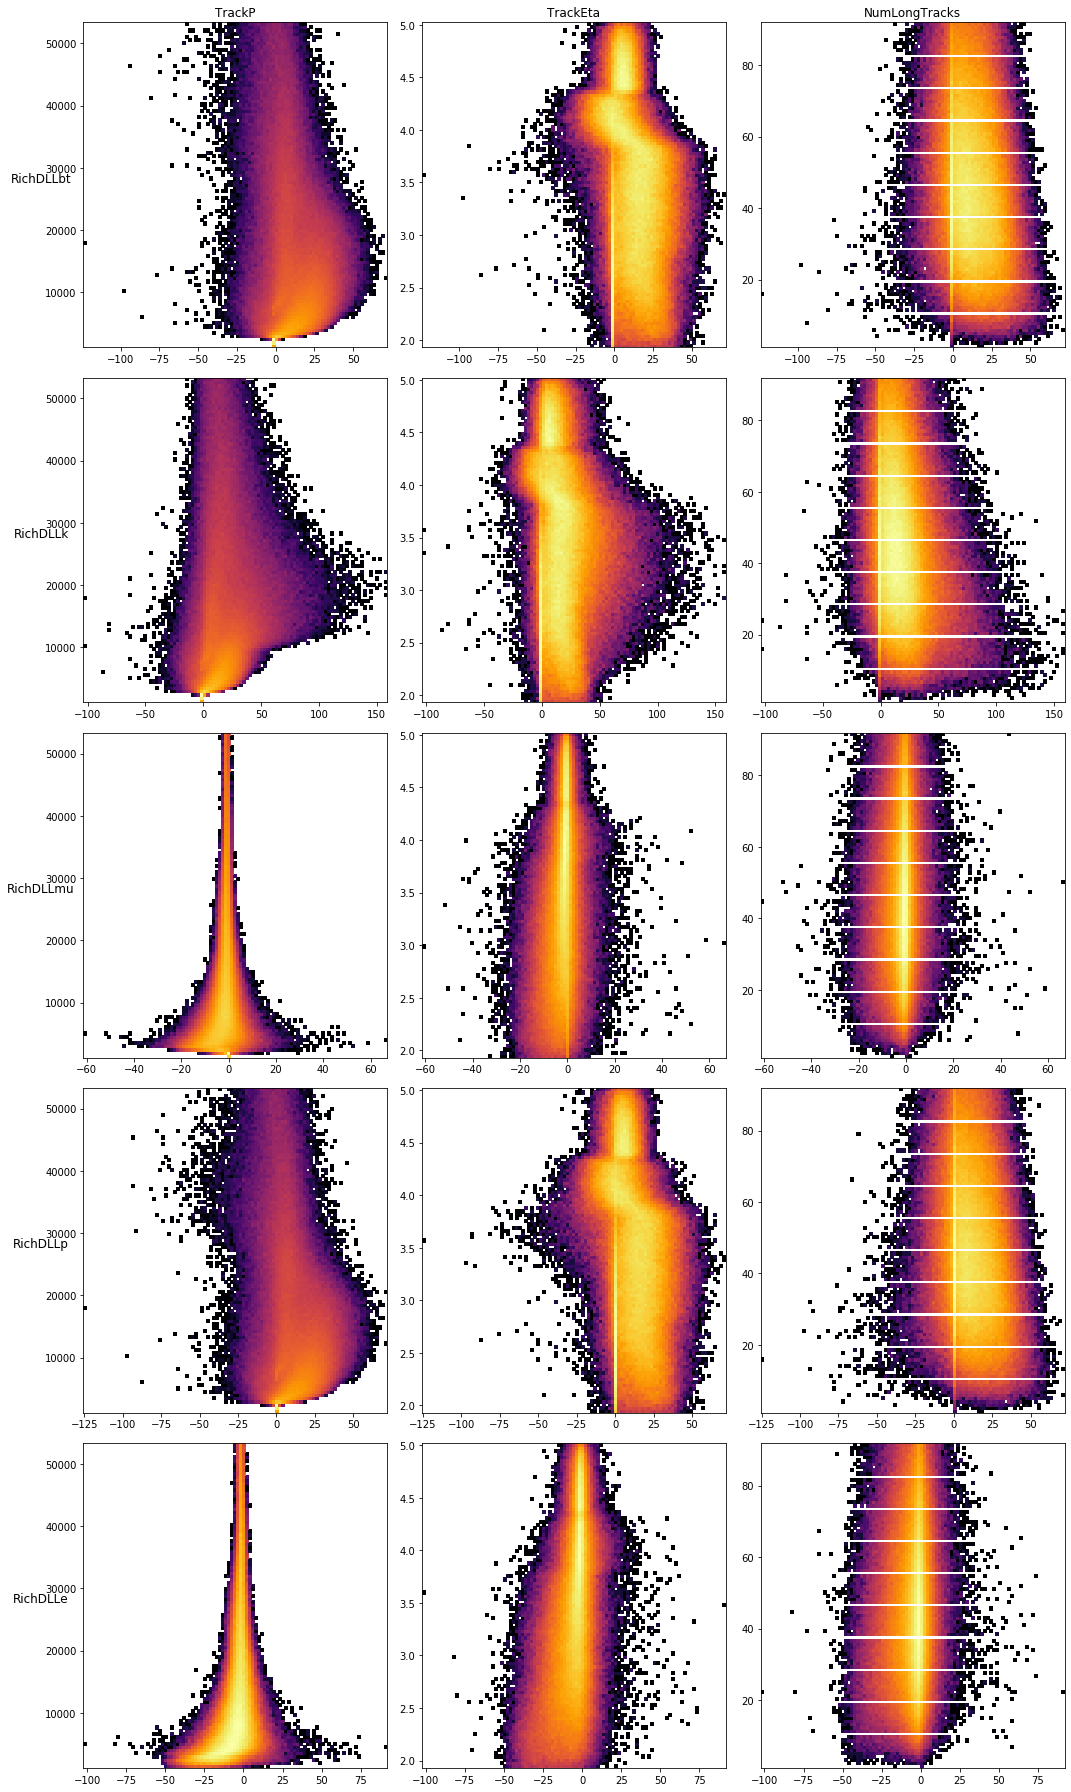

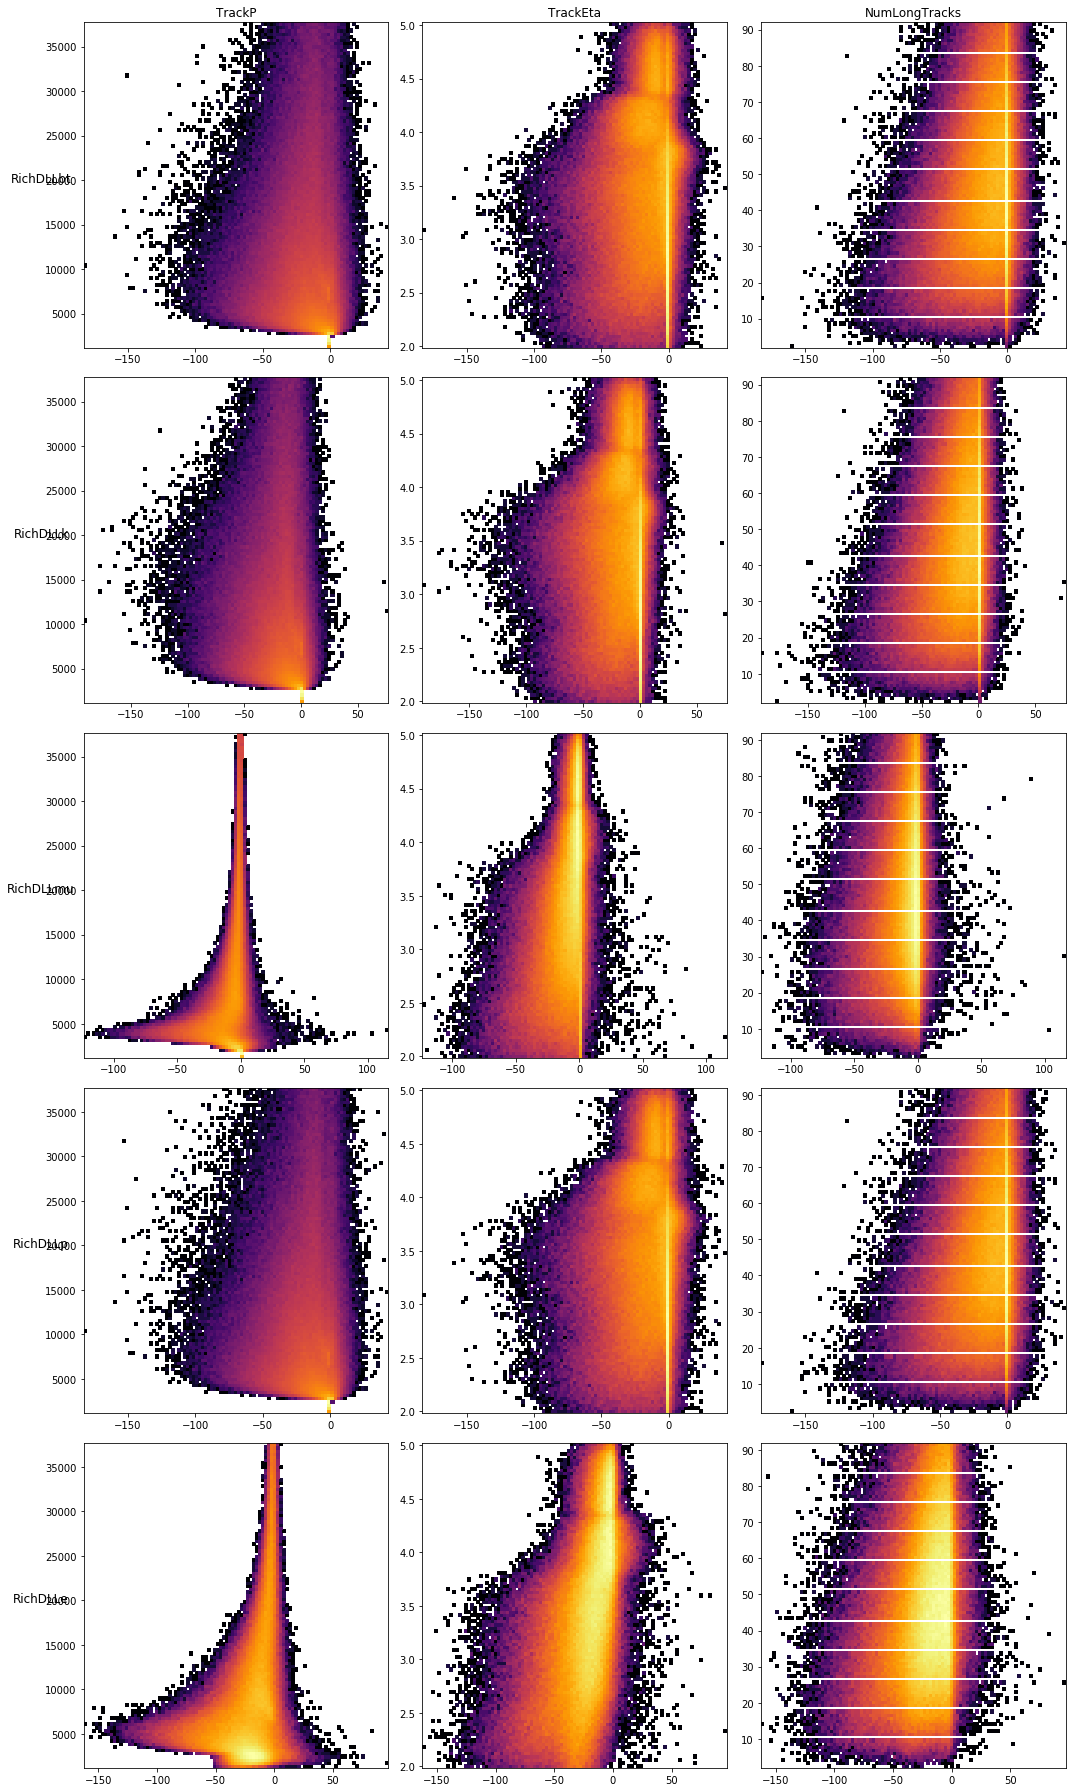

In [52]:
for p in particles:
    fig = plot_hist2d(data[p][masks[p]], x_cols, y_cols, 101, 101)
    fig.savefig(f'/_data/joint_{p}.png', format='png')

# The simplest model possible

In [12]:
class Model:
    def train(self, X, Y):
        self.means = {}
        self.stds = {}
        for col in Y.columns:
            self.means[col] = np.mean(Y[col])
            self.stds [col] = np.std (Y[col])

    def predict(self, X):
        prediction = pd.DataFrame()
        for col in self.means.keys():
            prediction[col] = np.random.normal(
                                loc=self.means[col],
                                scale=self.stds[col],
                                size=len(X)
                            )
        return prediction

In [6]:
from sklearn.model_selection import KFold
from scipy.stats import ks_2samp

In [7]:
def score_func(sample1, sample2, n_slices=100):
    score = 0
    cols = x_cols + y_cols
    w_normal = np.random.normal(size=(n_slices, len(cols)))
    sample1 = sample1.copy()[cols].values
    sample2 = sample2.copy()[cols].values
    for k in range(n_slices):
        score = max(score,
                    ks_2samp(
                        np.sum(w_normal[k] * sample1, axis=1), 
                        np.sum(w_normal[k] * sample2, axis=1)
                    )[0]
                   )
    return score

In [15]:
kf = KFold(n_splits=5)

model_scores = {p:[] for p in data}
best_scores  = {p:[] for p in data}

for p in data:
    for train_index, test_index in kf.split(data[p][x_cols]):
        X_train = data[p][x_cols].iloc[train_index]
        Y_train = data[p][y_cols].iloc[train_index]
        X_test  = data[p][x_cols].iloc[test_index]
        Y_test  = data[p][y_cols].iloc[test_index]
      
        model = Model()
        model.train(X_train[masks[p][train_index]], Y_train[masks[p][train_index]])
        Y_pred = model.predict(X_test)
        
        sample_pred = pd.concat((X_test,Y_pred),axis=1)
        sample_train = pd.concat((X_train,Y_train),axis=1)
        sample_test = pd.concat((X_test,Y_test), axis=1)
        model_scores[p].append(score_func(sample_pred, sample_test))
        best_scores[p].append(score_func(sample_train, sample_test))

In [16]:
for p in best_scores:
    print(p)
    print(best_scores[p],'\n')

muon
[0.013064287709811495, 0.003318275470905685, 0.01782693071633662, 0.004613377964527543, 0.008825439574450589] 

ghost
[0.0036412682063410307, 0.0033662668313341193, 0.0028925144625723265, 0.004031270156350852, 0.004658773293866436] 

kaon
[0.006406030962646803, 0.0027579057862189282, 0.009593984336944417, 0.0031874688274192153, 0.0040352810293145525] 

proton
[0.002604386130512615, 0.0030472990445190584, 0.0031143994118960627, 0.0030252726592228663, 0.003724011122480664] 

pion
[0.003109719416553358, 0.0031779466605007523, 0.003583233113515494, 0.0025346716848643203, 0.0034315284076982255] 

electron
[0.007173034192066274, 0.0019926704515962346, 0.006334444792239213, 0.003712962086512117, 0.0018394553527232294] 



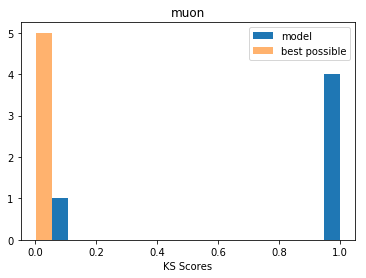

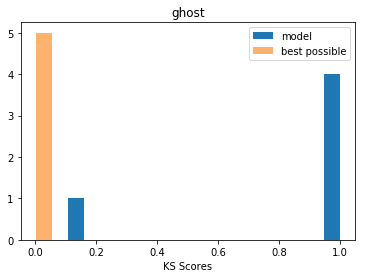

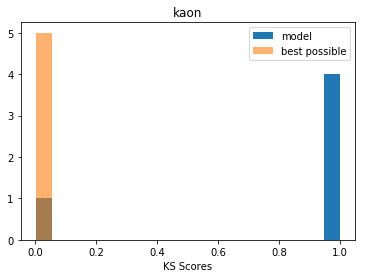

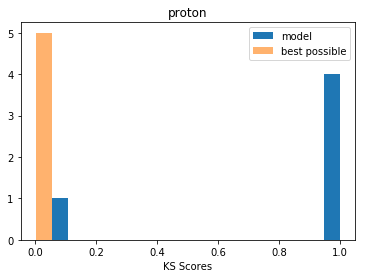

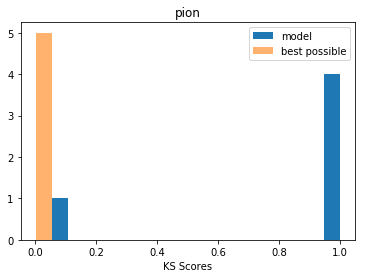

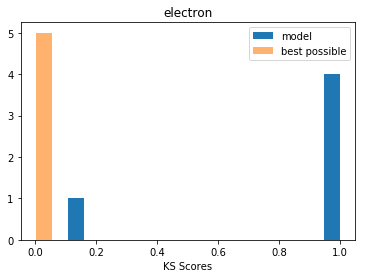

In [17]:
for p in best_scores:
    bins = np.linspace(
                start=min(model_scores[p] + best_scores[p]), 
                stop =max(model_scores[p] + best_scores[p]), 
                num=20
            )
    
    plt.hist(model_scores[p], bins=bins, label='model')
    plt.hist(best_scores[p] , bins=bins, label='best possible', alpha=0.6)
    plt.legend()
    plt.xlabel('KS Scores')
    plt.title(p)
    plt.show();

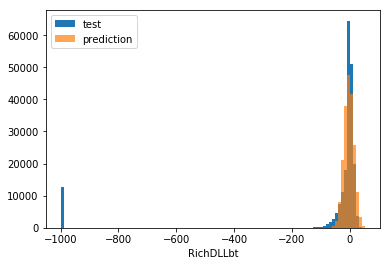

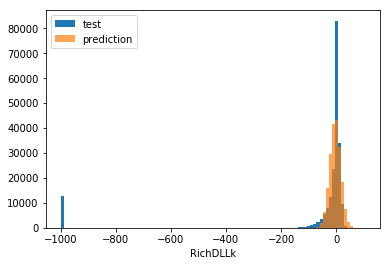

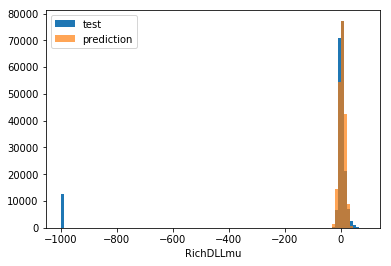

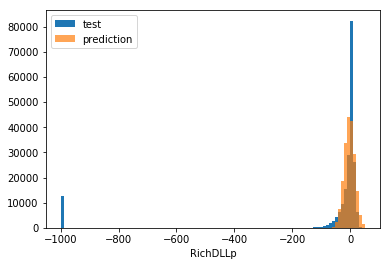

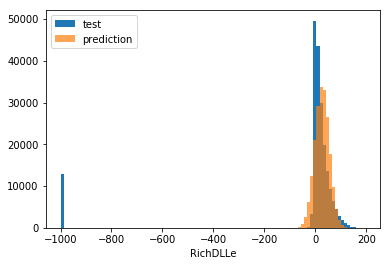

In [18]:
for col in Y_pred.columns:
    _, bins, _ = plt.hist(Y_test[col], bins=100 , label='test'      )
    _, _   , _ = plt.hist(Y_pred[col], bins=bins, label='prediction', alpha=0.7)
    plt.legend()
    plt.xlabel(col)
    plt.show();

##  Conditional Gaussian Model

$P(Y|X)\sim N(\mu(X),\Sigma(X))$

First we go for model with $Cov(y_i,y_j)=0, i\not =j$, namely distinct model for each component of $Y$. Also for simplicity we condition on only one component of $X$


In [8]:
x = data['kaon']['TrackP']
y = data['kaon']['RichDLLk']

In [9]:
from sklearn.linear_model import LinearRegression

In [13]:
def f(x):
    d = {}
    d['x_median'] = x.iloc[0].median()
    d['y_mean'] = x.iloc[1].mean()
    d['y_std'] = x.iloc[1].std()
    return pd.Series(d,list(d.keys()))

class Model:
    
    def __init__(self,n_intervals=4):
        self.n_intervals = n_intervals
        
    def train(self, X, Y):
        
        data = pd.concat((X.copy(), Y.copy()),axis=1)
        bounds =  np.quantile(x,[i/self.n_intervals for i in range(self.n_intervals + 1)])
        lefts = bounds[:-1]
        lefts[0] -= 1
        rights = bounds[1:]
        
        a = np.repeat(X.values,len(rights)).reshape((-1,len(rights))) <= rights
        b = np.repeat(X.values,len(lefts)).reshape((-1,len(lefts))) > lefts
        mask = np.where(a & b)[1]
        data['mask'] = mask
        
        train = data.groupby('mask').apply(f)

        self.reg_mean = LinearRegression().fit(train['x_median'].values.reshape((-1,1)), train['y_mean'].values)
        self.reg_std = LinearRegression().fit(train['x_median'].values.reshape((-1,1)), train['y_std'].values)
        
    def predict(self, X):
        prediction = pd.DataFrame()
        means = self.reg_mean.predict(X.values.reshape(-1,1))
        stds = self.reg_std.predict(X.values.reshape(-1,1))
        return np.random.standard_normal()*stds + means

In [16]:
m = Model(100)
m.train(x,y)

In [18]:
m.predict(x).std()

7811199.293755319

In [121]:
y.std()

126.90118556489254